In [2]:
import pandas as pd
import numpy as np
from minisom import MiniSom as SOM
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import matplotlib as mpl
mpl.use("Agg")
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (20,10)
plt.style.use('fivethirtyeight')

# Análisis de expresión

Cargamos los datos

In [3]:
df = pd.read_csv("http://compbio.uthsc.edu/microarray/MeV/Data/Example_large.txt", sep="\t")
df.head(20)

,YORF,NAME,GWEIGHT,Ex1,Ex2,Ex3,Ex4,Ex5,Ex6,Ex7,Ex8,Ex9,Ex10
0,EWEIGHT,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,A0,A0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,B0,B0,1.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
3,C0,C0,1.0,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
4,D0,D0,1.0,2.000000,2.500000,3.000000,2.500000,2.000000,1.500000,1.000000,1.500000,2.000000,2.500000
5,E0,E0,1.0,2.000000,1.500000,1.000000,1.500000,2.000000,2.500000,3.000000,2.500000,2.000000,1.500000
6,F0,F0,1.0,-2.000000,-2.500000,-3.000000,-2.500000,-2.000000,-1.500000,-1.000000,-1.500000,-2.000000,-2.500000
7,G0,G0,1.0,-2.000000,-1.500000,-1.000000,-1.500000,-2.000000,-2.500000,-3.000000,-2.500000,-2.000000,-1.500000
8,H0,H0,1.0,-2.000000,-2.000000,-2.000000,-1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000
9,J0,J0,1.0,2.000000,2.000000,2.000000,1.000000,0.000000,-1.000000,-2.000000,-2.000000,-2.000000,-2.000000


In [4]:
df.shape

(460, 13)

In [5]:
df.to_csv("gene_expresssion_large_1.csv")

In [6]:
df = df[["NAME","Ex1", "Ex2", "Ex3", "Ex4", "Ex5", "Ex6", "Ex7", "Ex8", "Ex9", "Ex10"]]

In [7]:
df.fillna(0, inplace=True)

In [8]:
df.shape

(460, 11)

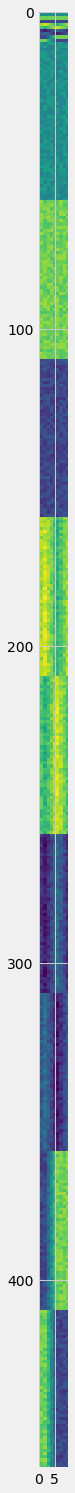

In [9]:
cols_exs = ["Ex1", "Ex2", "Ex3", "Ex4", "Ex5",  "Ex6", "Ex7", "Ex8", "Ex9", "Ex10"]

fig = plt.figure(figsize=(40,25))
plt.imshow(df[cols_exs].values)

In [10]:
df.NAME



0        0
1       A0
2       B0
3       C0
4       D0
      ... 
455    J46
456    J47
457    J48
458    J49
459    J50
Name: NAME, Length: 460, dtype: object

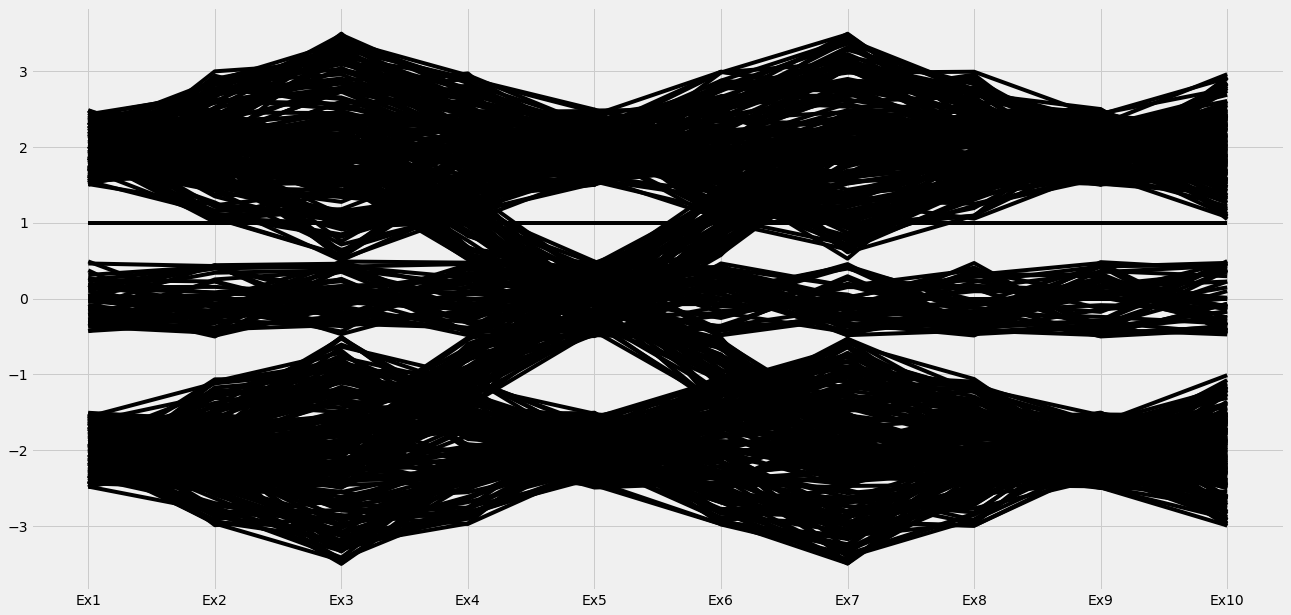

In [11]:
for i,r in df.iterrows():
    plt.plot(r[1:], color='black')

In [12]:
svd = np.linalg.svd
u,s,vt = svd(df[cols_exs])

([<matplotlib.axis.XTick at 0x7faf060afc88>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

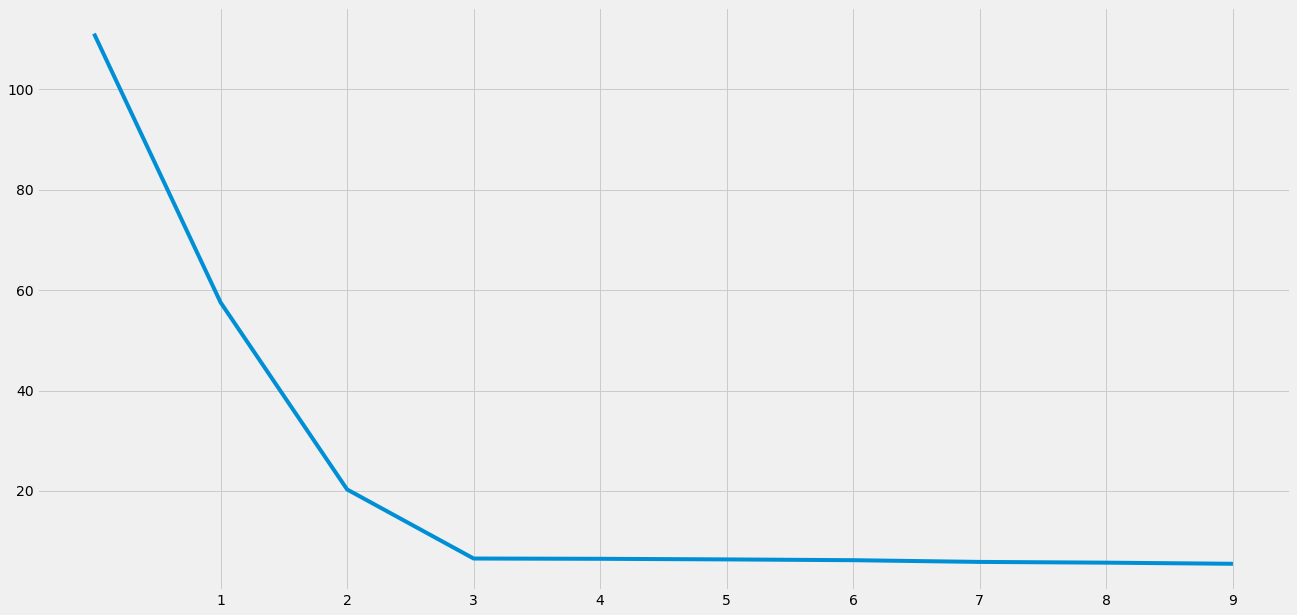

In [14]:
plt.plot(s)
plt.xticks(range(1,10))

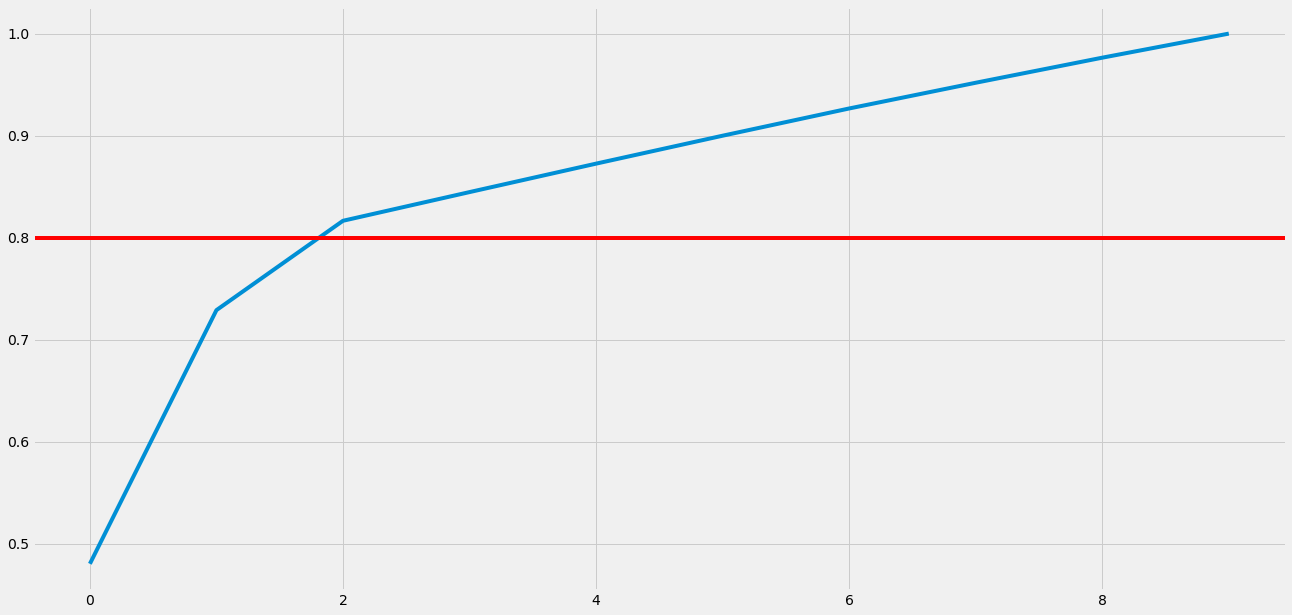

In [13]:
plt.plot(np.array([x/sum(s) for x in s]).cumsum())
plt.axhline(y=0.8, c='r')

### eigengenes

Vamos a visualizar a cada uno de los eigenvectores que generan los genes

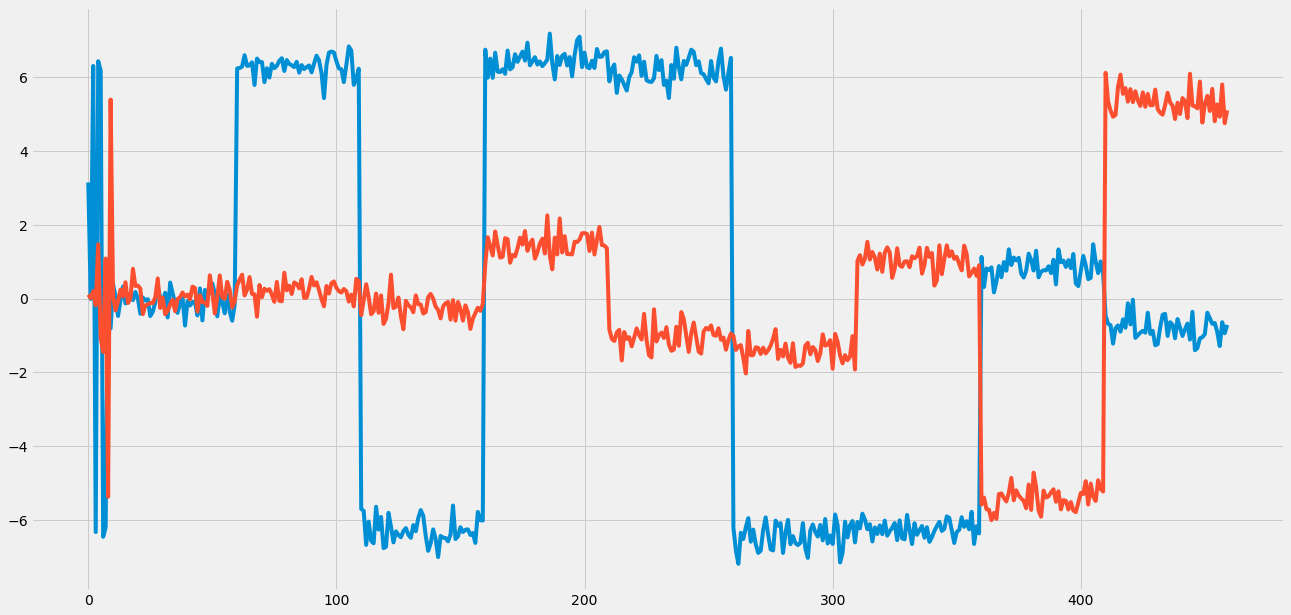

In [19]:
plt.plot(V[:,0])
plt.plot(V[:,1])



In [49]:
reconstruye = lambda p,s,q,n : np.dot( np.dot(p[:,:n], np.diag(s[:n])), q[:n])
X2 = reconstruye(u,s,vt,2)

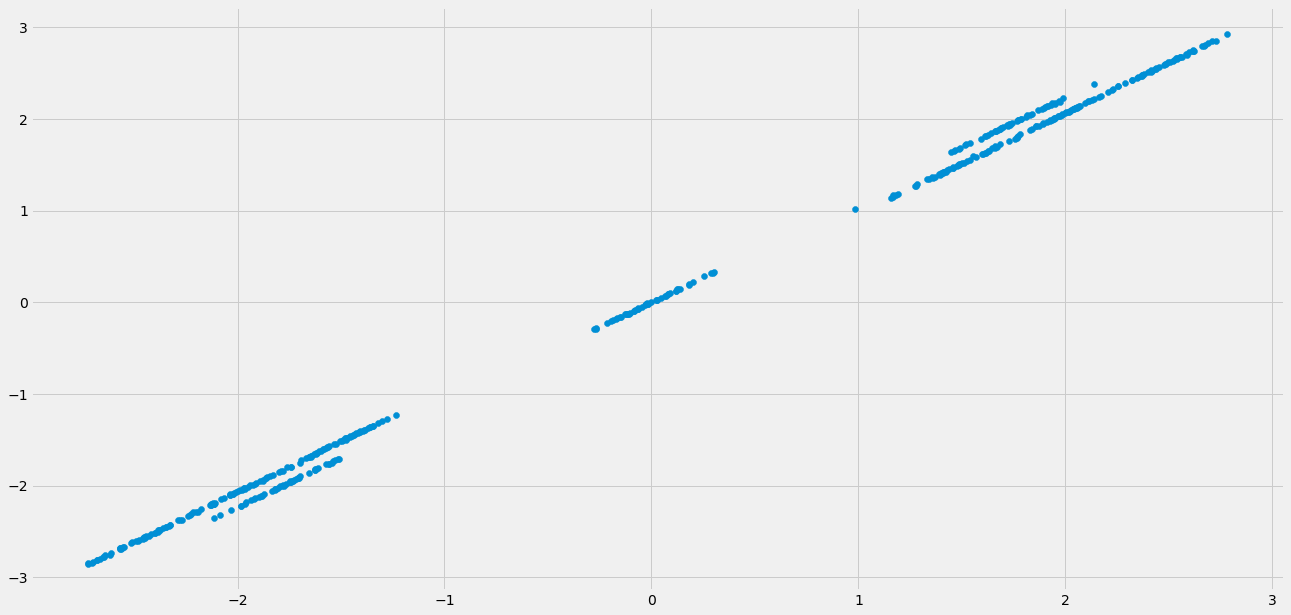

In [51]:
plt.scatter(X2[:,0], X2[:,1])

## PCA

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)

Hacemos el análisis de componentes de las columnas elegidas y lo dejamos en V

In [17]:
V = pca.fit_transform(df[cols_exs])

In [18]:
V[:,1].shape

(460,)

Vamos a analizar con cuánta varianza contribuye cada componente. 

([<matplotlib.axis.XTick at 0x7faf086fdb70>,
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9')])

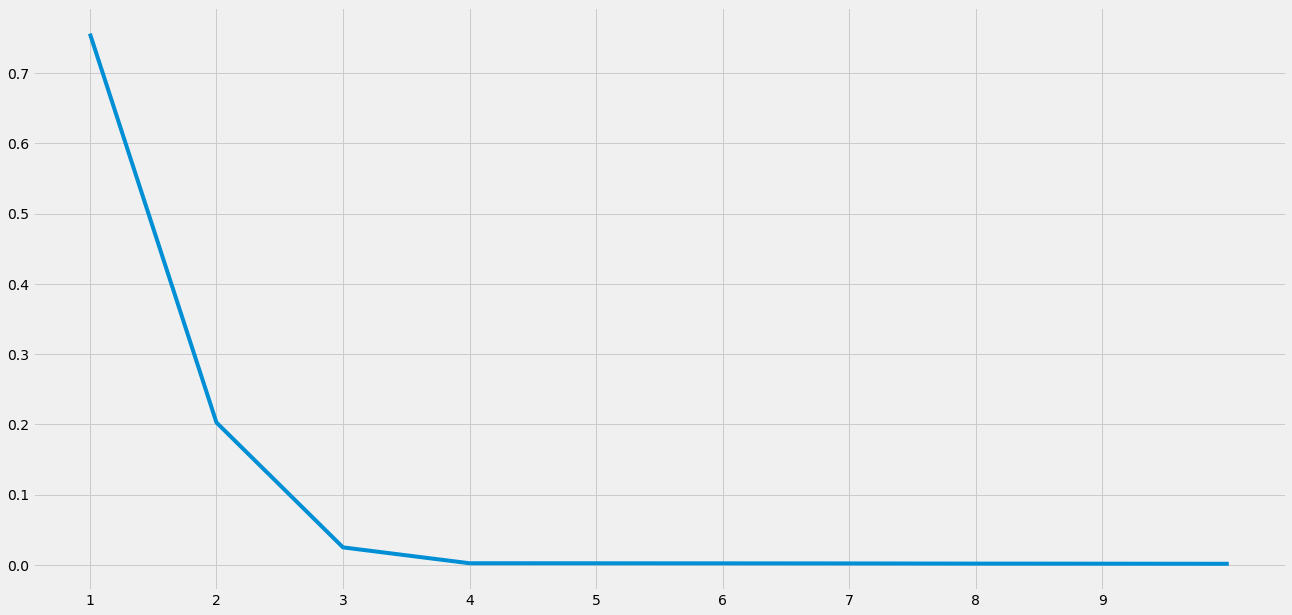

In [24]:

plt.plot(pca.explained_variance_ratio_)
plt.xticks(range(0,9), range(1,10))

([<matplotlib.axis.XTick at 0x7faefdd8d470>,
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9')])

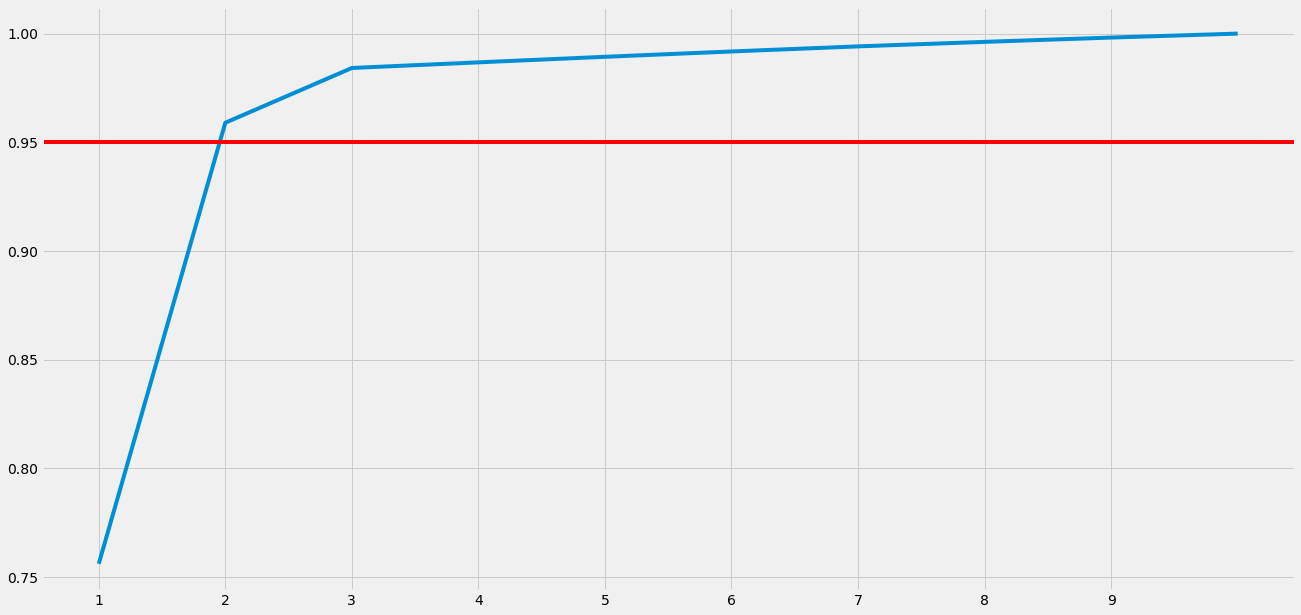

In [30]:
Vacum = [v/sum(pca.explained_variance_ratio_) for v in V]
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.axhline(y=0.95, c='r')
plt.xticks(range(0,9), range(1,10))

Text(0, 0.5, 'PC2')

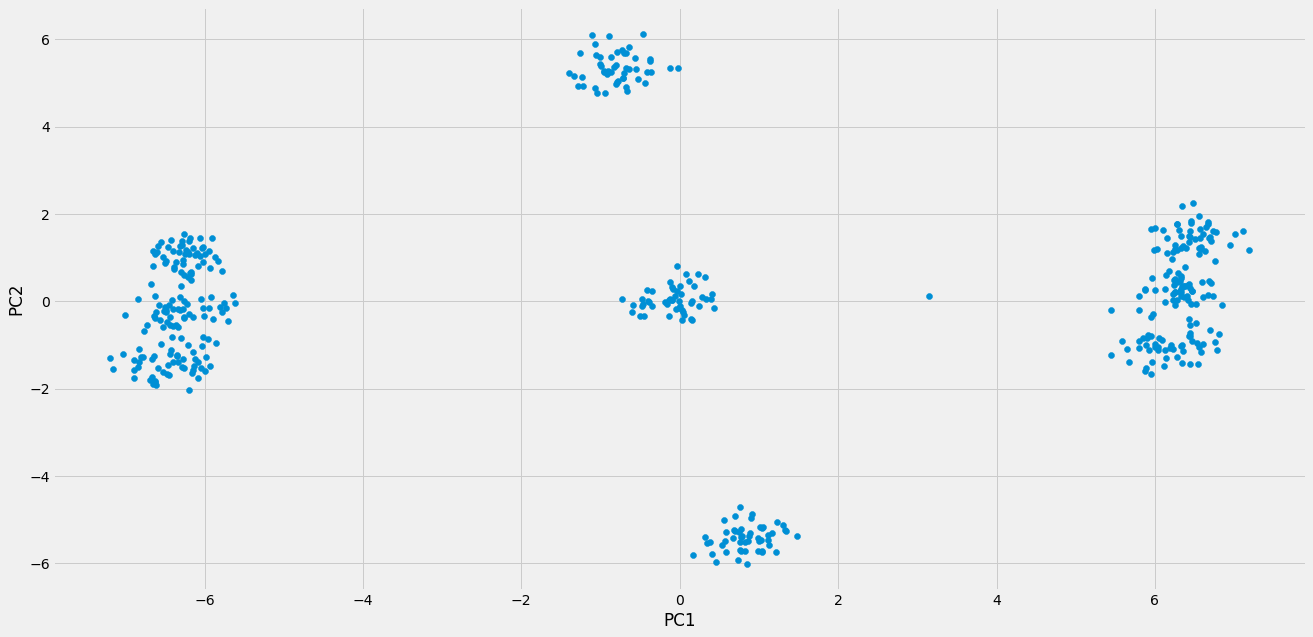

In [21]:
plt.scatter(V[:,0], V[:,1])
plt.xlabel("PC1")
plt.ylabel("PC2")

In [23]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
for k in [3,4,5,6]:
    clf = KMeans(n_clusters=k, random_state=0).fit(V[:,0:2])
    lbs = clf.labels_
    scr = davies_bouldin_score(V[:,0:2], lbs)
    print("k: {} - > scr {}".format(k,scr))

k: 3 - > scr 0.7451224294128099
k: 4 - > scr 0.49910614530848063
k: 5 - > scr 0.1948106256234145
k: 6 - > scr 0.33182471761587745


In [25]:
clf = KMeans(n_clusters=5).fit(V[:,0:2])
lbs = clf.labels_
print(lbs)

[1 0 1 2 1 1 2 2 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]


In [26]:
for g,l in zip(list(df.NAME.iloc[1:]), lbs):
    print("gen {}  pertenece a grupo {}".format(g,l))

gen A0  pertenece a grupo 1
gen B0  pertenece a grupo 0
gen C0  pertenece a grupo 1
gen D0  pertenece a grupo 2
gen E0  pertenece a grupo 1
gen F0  pertenece a grupo 1
gen G0  pertenece a grupo 2
gen H0  pertenece a grupo 2
gen J0  pertenece a grupo 3
gen A1  pertenece a grupo 4
gen A2  pertenece a grupo 0
gen A3  pertenece a grupo 0
gen A4  pertenece a grupo 0
gen A5  pertenece a grupo 0
gen A6  pertenece a grupo 0
gen A7  pertenece a grupo 0
gen A8  pertenece a grupo 0
gen A9  pertenece a grupo 0
gen A10  pertenece a grupo 0
gen A11  pertenece a grupo 0
gen A12  pertenece a grupo 0
gen A13  pertenece a grupo 0
gen A14  pertenece a grupo 0
gen A15  pertenece a grupo 0
gen A16  pertenece a grupo 0
gen A17  pertenece a grupo 0
gen A18  pertenece a grupo 0
gen A19  pertenece a grupo 0
gen A20  pertenece a grupo 0
gen A21  pertenece a grupo 0
gen A22  pertenece a grupo 0
gen A23  pertenece a grupo 0
gen A24  pertenece a grupo 0
gen A25  pertenece a grupo 0
gen A26  pertenece a grupo 0
gen

In [35]:
df.iloc[lbs==1].NAME

0        0
2       B0
4       D0
5       E0
60      B1
      ... 
255    E46
256    E47
257    E48
258    E49
259    E50
Name: NAME, Length: 154, dtype: object

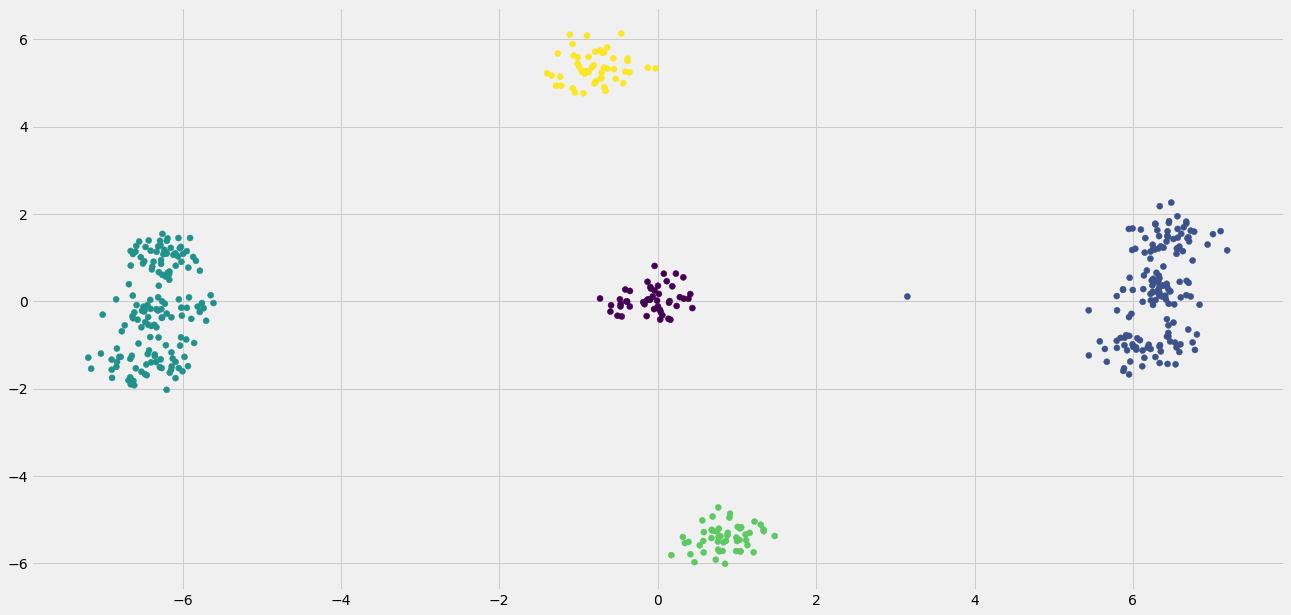

In [27]:
plt.scatter(V[:,0], V[:,1], c=lbs)

1


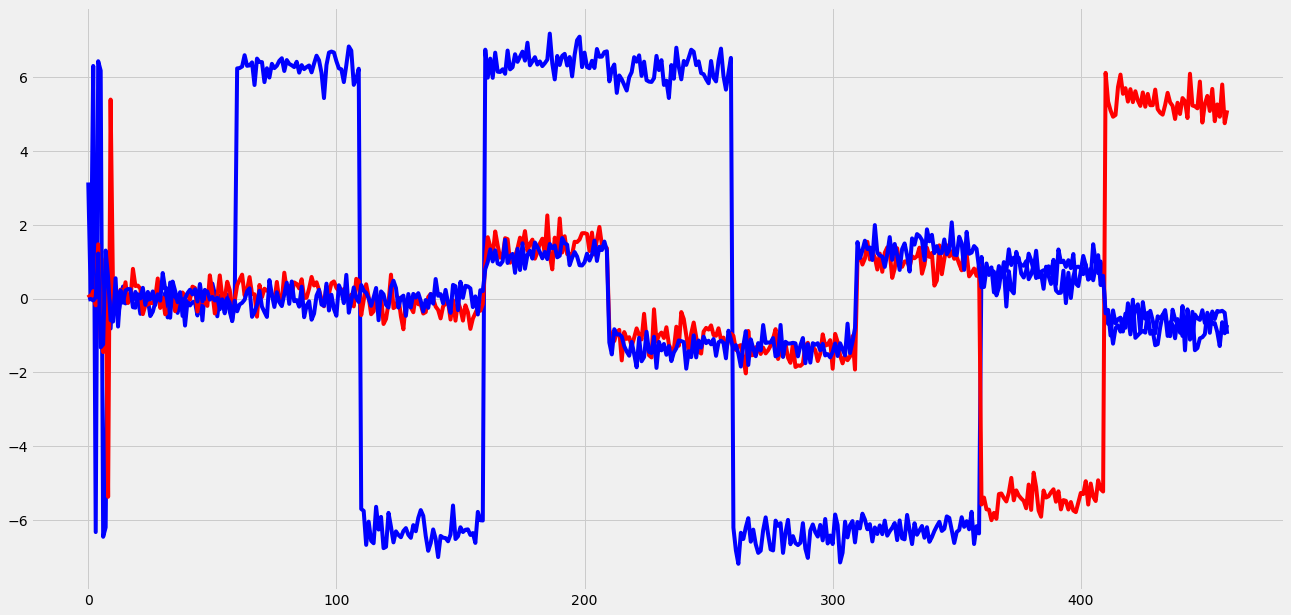

In [28]:
lc = {0:'red', 1:'blue', 2:'green', 3:'black', 4:'purple'}
print(lbs[0])
plt.plot(V[:,0], color=lc[lbs[0]])
plt.plot(V[:,1], color=lc[lbs[1]])
plt.plot(V[:,2], color=lc[lbs[2]])

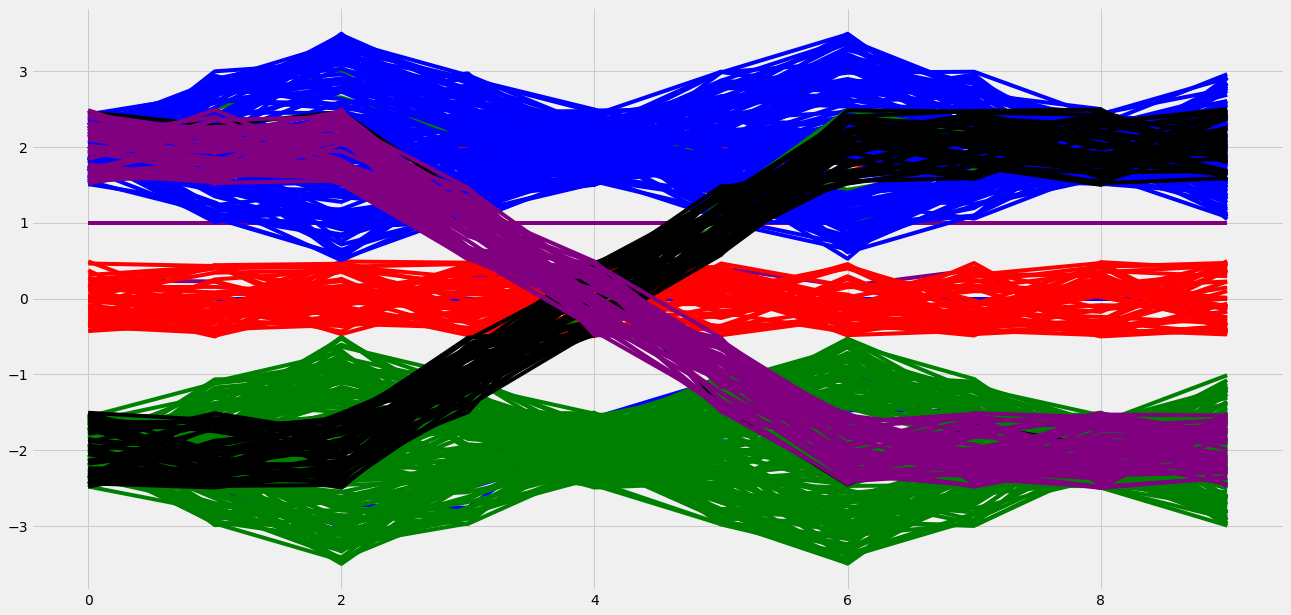

In [29]:

for r,c in zip(df.iterrows(),lbs):
    i, row = r
    plt.plot(np.array(row[1:]), color=lc[lbs[i-1]])


## SOM

Algoritmo usado principalmente para hacer reducción de dimensión

In [90]:
#tam de la malla
n = df.shape[0]
print("Numero de instancias {}".format(n))
M = int(5*np.power(n,0.5))
print(u"Número de unidades {}".format(M))
(r,c) = 12,9
print(u"Filas {}".format(r))
print(u"Columnas {}".format(c))
sigmas = [1,2]
constantes = [0.1, 0.2, 1, 2]
dim_som = (r,c)
datos = StandardScaler().fit_transform(df[cols_exs].values)
print(datos[0])
k = len(datos[0])
print("Dimension de datos {}".format(k))

Numero de instancias 460
Número de unidades 107
Filas 12
Columnas 9
[0.53531533 0.51727611 0.48987205 0.57227784 0.60168575 0.56249835
 0.49252059 0.51865778 0.51691295 0.51922569]
Dimension de datos 10


In [94]:
errores = []

for s in sigmas:
    for c in constantes:
        som = SOM(dim_som[0], dim_som[1], k, sigma=s, learning_rate=c, topology='hexagonal')
        som.random_weights_init(datos)
        som.train_batch(datos,500)
        q = som.quantization_error(datos)
        errores.append( (s,c, q) )
        print( "s: {}  c: {} -> q: {}".format(s,c,q))

s: 1  c: 0.1 -> q: 0.48788500753645075
s: 1  c: 0.2 -> q: 0.44892573477347036
s: 1  c: 1 -> q: 0.4229186371970116
s: 1  c: 2 -> q: 0.41691160255032217
s: 2  c: 0.1 -> q: 0.5151296839229804
s: 2  c: 0.2 -> q: 0.45729767794799336
s: 2  c: 1 -> q: 0.5524779852359211
s: 2  c: 2 -> q: 0.8267116269438756


In [100]:
mejor = sorted(errores, key=lambda x: x[2])[0]
print("Sigma {}, ca {}".format(mejor[0], mejor[1]))

Sigma 1, ca 2


In [83]:
som = SOM(dim_som[0], dim_som[1], k, sigma=1, learning_rate=2)
som.train_batch(datos,50, verbose=True)


 [ 50 / 50 ] 100% - 0:00:00 left 
 quantization error: 0.5020383174436893


In [96]:
M =  1 - som.distance_map()

<Figure size 1440x720 with 0 Axes>

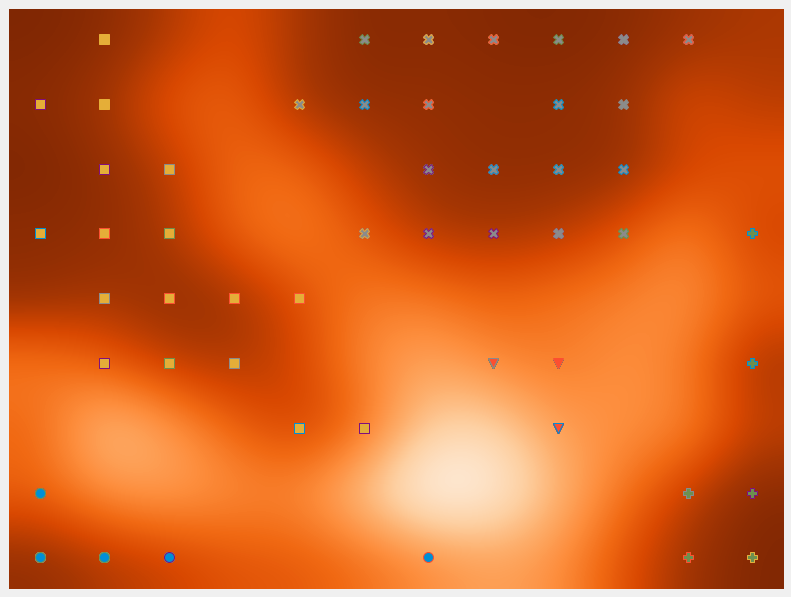

In [99]:
plt.clf()
fig, axn = plt.subplots(1,1)

marcadores = ['o', 'v', 's', 'P', 'X']
colores =    ['C0','C1','C2','C3','C4']


plt.imshow(M.T, interpolation='bicubic', cmap='Oranges')
plt.xticks([])
plt.yticks([])

for ix,d in enumerate(datos):
    w = som.winner(d)
    plt.plot(w[0], w[1], marcadores[lbs[ix]],markerfacecolor=colores[lbs[ix]], markersize=10)
    